# <span style='background :#D6DBDF ' > **Topic: Stroke Prediction**

#### Overview
1. [Purpose](#1) <a href= "1"></a>
2. [Data and python packages importing](#2) <a href= "2"></a>
3. [Data cleaning process](#3) <a href= "3"></a>
4. [Exploratory Data Analysis (EDA)](#4) <a href= "4"></a><br>
    4.1 [Categories Data](#4-1) <a href= "4.1"></a><br>
    4.2 [Continuous data](#4-2) <a href= "4.2"></a>
5. [Data Preprocessing (Encoding)](#5) <a href= "5"></a><br>
    5.1 [Binary Categories](#5-1) <a href= "5.1"></a><br>
    5.2 [Multicategory:  One-Hot encoding](#5-2) <a href= "5.2"></a><br>
    5.3 [Assign binany category and multi-category to new dataframe "df_preProcess"](#5-3) <a href= "5.3"></a>
6. [Feature selection](#6) <a href= "6"></a><br>
    6.1 [Pearson Correlation](#6-1) <a href= "6.1"></a><br>
    6.2 [Final Dateset](#6-2) <a href= "6.2"></a>
7. [Splitting the dataset into the Training set (80%) and Test set (20%)](#7) <a href= "7"></a>
8. [Feature Scaling with StandardScaler](#8) <a href= "8"></a>
9. [Handling Imbalance data using SMOTE](#9) <a href= "9"></a>
10. [Model Selection](#10) <a href= "10"></a><br>
    10.1 [K-Fold Cross Validation](#10-1) <a href= "10.1"></a><br>
    10.2 [Confusion matrix](#10-2) <a href= "10.2"></a><br>
    10.3 [Sammary Model Selection](#10-3) <a href= "10.3"></a>
11. [Tuning the Models](#11) <a href= "11"></a><br>
    11.1 [RidgeClassifier](#11-1) <a href= "11.1"></a><br>
    11.2 [LinearSVC](#11-2) <a href= "11.2"></a><br>
    11.3 [SVC](#11-3) <a href= "11.3"></a><br>
    11.4 [LogisticRegression](#11-4) <a href= "11.4"></a><br>
    11.5 [KNeighborsClassifier](#11-5) <a href= "11.5"></a><br>
    11.6 [RandomForestClassifier](#11-6) <a href= "11.6"></a><br>
    11.7 [Summary Model Accuracy](#11-7) <a href= "11.7"></a>
12. [Keras](#12) <a href= "1"></a><br>
    12.1 [Prepare the environment](#12-1) <a href= "12.1"></a><br>
    12.2 [Create the network architecture and tuning hyperparameter (KerasTuner)](#12-2) <a href= "12.2"></a><br>
    12.3 [Compile the model](#12-3) <a href= "12.3"></a><br>
    12.4 [Train the model on train set](#12-4) <a href= "12.4"></a><br>
    12.5 [Evaluate Model](#12-5) <a href= "12.5"></a>

# <font color="MidnightBlue">1. Purpose<a id="1"></a>

To compared Traditional ML and MLP in classification problem

# <font color="MidnightBlue">2. Data and Python packages importing<a id="2"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <font color="MidnightBlue">3. Data cleaning process<a id="3"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

   > จากข้อมูลทั้งหมดพบ 201 missing values ในคอลัมน์ 'bm'<br>
   > เราจึงดูรายละเอียดค่าทางสถิติของข้อมูลในคอลัมน์ 'bm' เพื่อเลือกวิธีจัดการกับ missing value

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> จากตารางข้อมูลทางสถิติด้านบน ค่าเฉลี่ยและค่ากลางของคอลัมน์ 'bm' มีค่าใกล้เคียงกันที่ 28.89 และ 28.01 ตามลำดับ ดังนั้น จึงอ้างอิงได้ว่าข้อมูลในคอลัมน์ 'bm' มีการแจกแจงแบบปกติ เราจึงเลือกจัดการกับ missing value ด้วยค่าเฉลี่ย

In [6]:
df.bm.mean()

28.893236911794666

In [7]:
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df.bm.mean())
df_mod.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bm                   0
smoking_status       0
stroke               0
dtype: int64

> จากรายละเอียดด้านบนไม่พบ missing value แล้ว<br>
> หากอ้างอิงจากตารางสถิติด้านบนในคอลัมน์ 'Age' พบว่าค่าน้อยที่สุดในคอลัมน์นั้นมีค่าน้อยกว่า 1

In [8]:
df_check = df_mod.age[df_mod.age <1]
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_mod.shape[0] )*100:.2f}%')

number of rows where the age is less than one: 43
% of rows where the age is less than one: 0.84%


> พบข้อมูล 43 แถวที่มีค่าในคอลัมน์ 'Age' น้อยกว่า 1 หรือคิดเป็นเพียง 0.84% จากข้อมูลทั้งหมดเท่านั้น ดังนั้นเราจึงเปลี่ยนค่าที่น้อยกว่า 1 ในคอลัมน์ 'Age' ให้มีค่าเป็น 1 ทั้งหมด

In [9]:
df_mod.loc[df_mod['age'] < 1,"age"] = 1
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.230677,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.605002,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# <font color="MidnightBlue">4. Exploratory Data Analysis (EDA)<a id="4"></a>

## <font color="MidnightBlue">4.1 Categories Data <a id="4-1"></a>

In [10]:
header = df_mod.columns

sns.set_theme(style="darkgrid")

def plot_detail(ax1, records):
    total = len(records)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)
        

def plot_category(col_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1 = sns.countplot(x=col_name, data = df_mod, ax=ax1)
    ax2 = sns.countplot(x=col_name, hue ="stroke", data = df_mod, ax=ax2)

    plot_detail(ax1, df_mod[col_name])
    ax1.set_title(col_name, size = 20)
    ax1.set_xlabel(col_name, size = 15)
    ax1.set_ylabel("Number of Patient", size = 15)

    plot_detail(ax2, df_mod[col_name])
    ax2.set_title(f"{col_name} with stroke", size = 20)
    ax2.set_xlabel(col_name, size = 15)
    ax2.set_ylabel("Number of Patient", size = 15)

    plt.show()

### <font color="MidnightBlue"> Gender

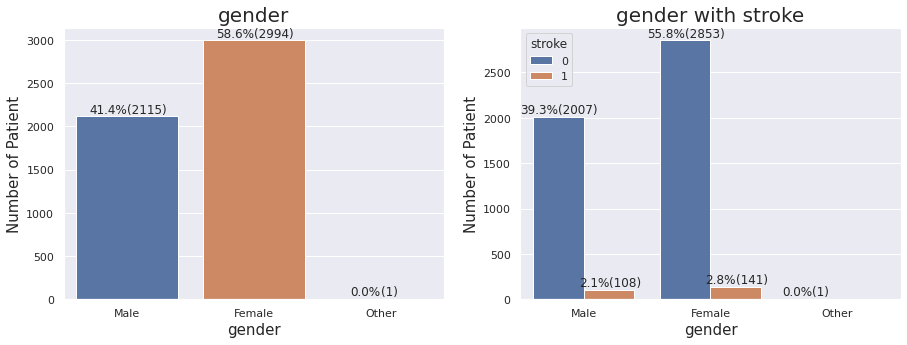

In [11]:
plot_category("gender")

จากข้อมูลทางการแพทย์ทั้งหมด 5,110 ราย 
- พบว่ามีผู้หญิง 2,979 (58%) และผู้ชาย 2,087 (41%) โดยมีผู้หญิงมากกว่าผู้ชาย 892 คน
- จำนวนผู้ป่วยโรคหลอดเลือดสมองในผู้หญิง และผู้ชายมีจำนวนใกล้เคียงคือ 141 และ 108 คนตามลำดับโดยคิดเป็น 2.8% และ 2.1% จากทั้งหมด

### <font color="MidnightBlue"> Hypertension

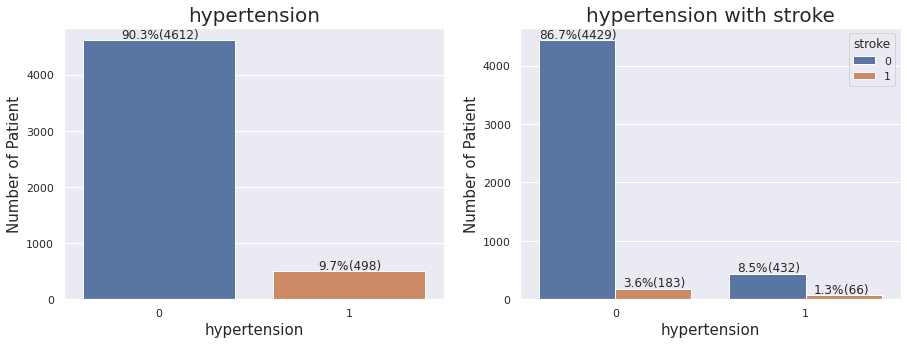

In [12]:
plot_category("hypertension")

- จำนวนคนที่เป็น Hypertension คิดเป็น 9.7% จากจำนวนคนทั้งหมด
- 3.6% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 1.3% เป็นคนที่มีอาการ stroke ร่วมกับ Hypertension

### <font color="MidnightBlue"> Heart Disease

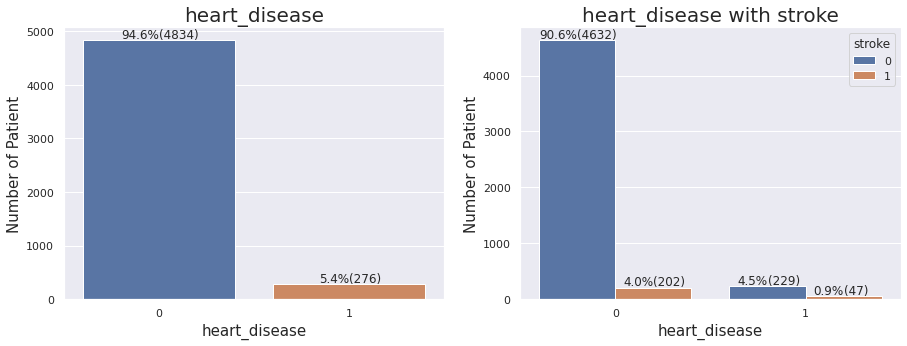

In [13]:
plot_category("heart_disease")

- จำนวนคนที่เป็น heart disease คิดเป็น 5.4% จากจำนวนคนทั้งหมด
- 4.0% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 0.9% เป็นคนที่มีอาการ stroke ร่วมกับ heart disease

### <font color="MidnightBlue"> Work Type

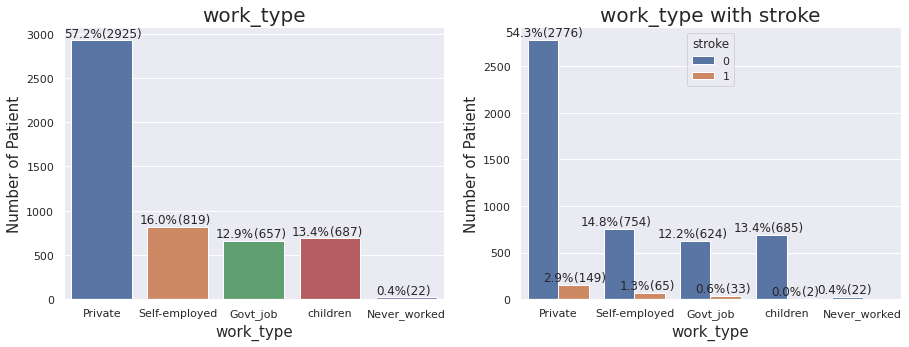

In [14]:
plot_category("work_type")

- ผู้ป่วยส่วนใหญ่กว่า 57.2% มี working type เป็น Private
- รองลงมาคือ Self-employed 16%, Government job 12.9% และ เป็นเด็ก 12.6%
- ในส่วนของผู้ป่วยที่ไม่ได้ทำงาน และ อื่นๆ มีจำนวนเพียงแค่ประมาณ 65 คน

### <font color="MidnightBlue"> Ever Married

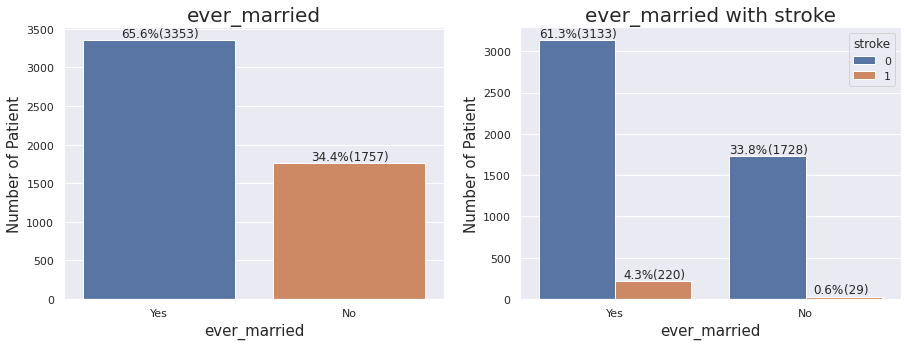

In [15]:
plot_category("ever_married")

- จำนวนคนที่แต่งงานแล้วคิดเป็น 65.6% จากจำนวนคนทั้งหมด โดยมี 4.3% (220 คน) ของคนที่แต่งงานแล้วเป็น stroke

### <font color="MidnightBlue"> Residence Type

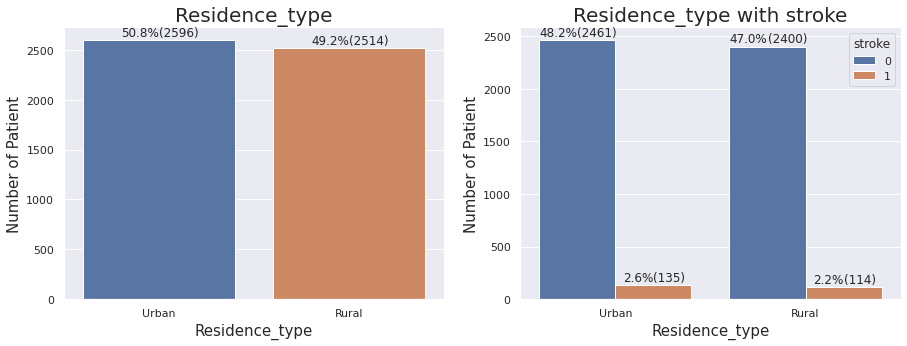

In [16]:
plot_category("Residence_type")

- ในส่วนของประเภทที่อยู่อาศัยของผู้ป่วย หรือ Residence type นั้น แบ่งออกเป็น Urban และ Rural ในปริมาณค่อนข้างใกล้เคียงกัน

### <font color="MidnightBlue"> Smoking Satus

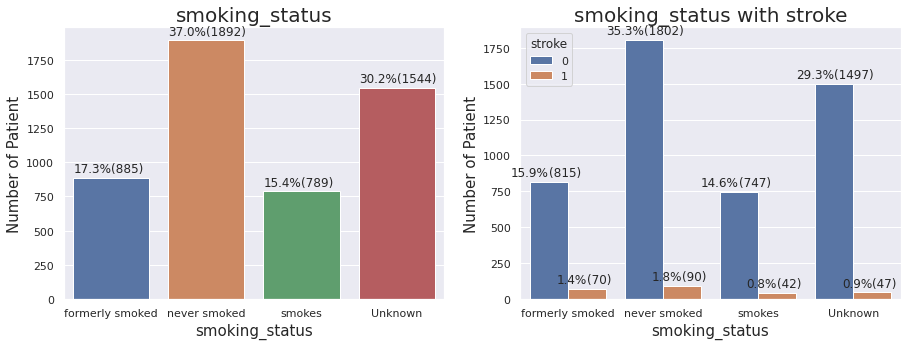

In [17]:
plot_category("smoking_status")

- มีจำนวนผู้ป่วยที่เป็น stroke ในปริมาณที่ใก้ลเคียงกันในทุกประเภทของประวัติการสูบบุหรี่

## <font color="MidnightBlue">4.2 Continuous data<a id="4-2"></a>

In [18]:
def plot_continuous(col_name):
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 10))
    sns.histplot(df_mod[df_mod['stroke'] == 0][col_name],bins=20, ax=ax1) # No Stroke - green
    sns.histplot(df_mod[df_mod['stroke'] == 1][col_name], color='chocolate',bins=20, ax=ax1) # Stroke - Red
    sns.boxplot(x=col_name, y = 'stroke', data = df_mod, hue_order=[0,1] , ax=ax2, orient='h')

    plt.title(f'No Stroke vs Stroke by {col_name}', fontsize=15)
    plt.show()

### <font color="MidnightBlue"> Avg Glucose Level

In [19]:
df_mod.groupby("stroke")["avg_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


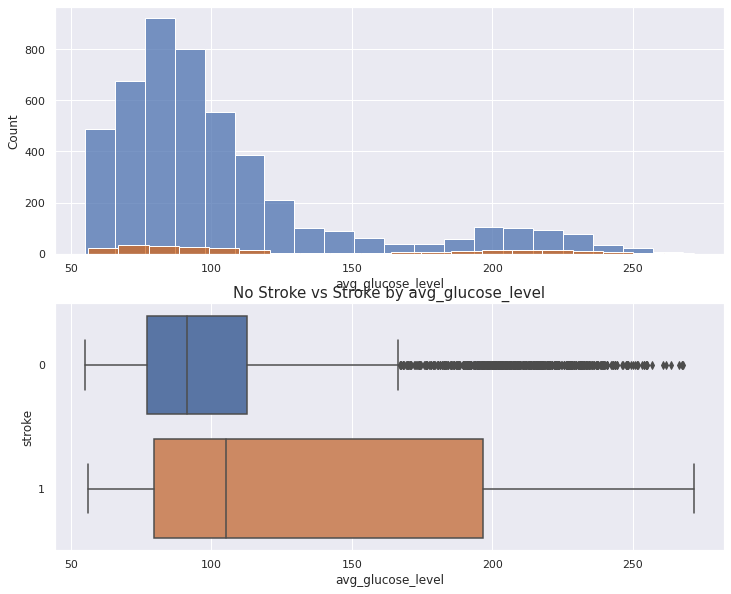

In [20]:
plot_continuous(header[8]) #Glucose

- Median ของปริมาณ glucose ในคนที่เป็น และ ไม่เป็น มีปริมาณใกล้เคียงกันที่ 91.47 และ 105.22 ตามลำดับ
- แต่ส่วนของคนที่มีอาการเป็น stroke มีการกระจายตัวมากกว่าคนที่ไม่เป็น โดยมีค่าระดับน้ำตาลในเลือดเฉลี่ยอยู่ในช่วงประมาณ 55 ถึง 130 ซึ่งเป็นการกระจายตัวจะมีลักษณะเป็น right skewed

### <font color="MidnightBlue"> BMI

In [21]:
df_mod.groupby("stroke")["bm"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


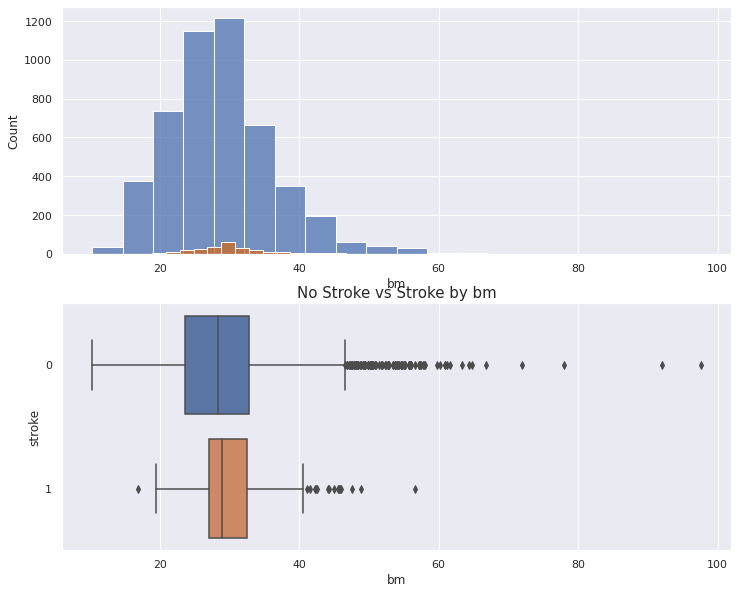

In [22]:
plot_continuous(header[9]) #BMI

- ค่า BMI ของคนที่เป็น และ ไม่เป็น มีแนวโน้มไปในทางเดียวกัน

### <font color="MidnightBlue"> Age

In [23]:
df_mod.groupby("stroke")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.975816,22.284029,1.00,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


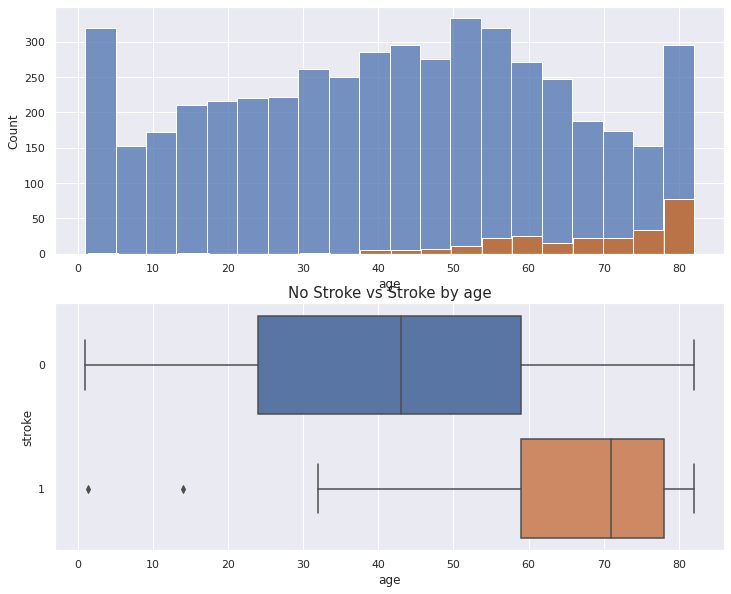

In [24]:
plot_continuous(header[2]) #Age

- ผู้ป่วยโรคหลอดเลือดสมองส่วนใหญ่จะเป็นผู้สูงอายุ หรือหากสังเกตุจากกราฟจะเริ่มพบผู้ป่วยโรคนี้ตั้งแต่อายุ 40 ปีขึ้นไป
- จาก boxplot การกระจายตัวของผู้ป่วยที่เป็น stroke อยู่ในช่วงอายุ มากกว่า 60 ปีขึ้นไป

# <font color="MidnightBlue">5. Data Preprocessing (Encoding)<a id="5"></a>

In [25]:
df_preProcess = df_mod

In [26]:
df_check = df_preProcess.gender[df_preProcess.gender =='Other']
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_preProcess.shape[0] )*100:.2f}%')

df_preProcess = df_preProcess.loc[df_mod.gender !='Other'] # drop 1 row of gender "Other"

number of rows where the age is less than one: 1
% of rows where the age is less than one: 0.02%


## <font color="MidnightBlue">5.1 Binary Categories<a id="5-1"></a>

In [27]:
idx_gender={"Female":0,"Male":1} 
df_preProcess.gender = df_preProcess.gender.apply(lambda x:idx_gender[x],)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
idx_married={"No":0,"Yes":1}
df_preProcess.ever_married = df_preProcess.ever_married.apply(lambda x:idx_married[x])

In [29]:
set(df_preProcess.gender)

{0, 1}

In [30]:
set(df_preProcess.ever_married)

{0, 1}

In [31]:
df_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bm                 5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 518.9+ KB


## <font color="MidnightBlue">5.2 Multicategory<a id="5-2"></a>

In [32]:
idx_multiClassData = pd.get_dummies(df_preProcess[["work_type","Residence_type",'smoking_status']], prefix=['worktype','Residencetype','smokingstatus'])
print(idx_multiClassData.head())

   worktype_Govt_job  worktype_Never_worked  worktype_Private  \
0                  0                      0                 1   
1                  0                      0                 0   
2                  0                      0                 1   
3                  0                      0                 1   
4                  0                      0                 0   

   worktype_Self-employed  worktype_children  Residencetype_Rural  \
0                       0                  0                    0   
1                       1                  0                    1   
2                       0                  0                    1   
3                       0                  0                    0   
4                       1                  0                    1   

   Residencetype_Urban  smokingstatus_Unknown  smokingstatus_formerly smoked  \
0                    1                      0                              1   
1                    0            

## <font color="MidnightBlue">5.3 Assign binany category and  multi-category to new dataframe "df_preProcess"<a id="5-3"></a>

In [33]:
df_preProcess= pd.concat([df_preProcess,idx_multiClassData], axis=1)

In [34]:
df_preProcess.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,...,worktype_Never_worked,worktype_Private,worktype_Self-employed,worktype_children,Residencetype_Rural,Residencetype_Urban,smokingstatus_Unknown,smokingstatus_formerly smoked,smokingstatus_never smoked,smokingstatus_smokes
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,...,0,1,0,0,0,1,0,1,0,0
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,...,0,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.400000,...,0,1,0,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


In [35]:
# Write Dataframe After pre process
df_Final = df_preProcess.drop(columns=['work_type', 'Residence_type', 'smoking_status'])
df_Final.head()

df_Final.to_csv("StrokeData_Final.csv", index=False)

# <font color="MidnightBlue">6. Feature selection<a id="6"></a>

In [36]:
# Change column position
old_cols = df_Final.columns.values 
new_cols= ['id', 'gender', 'hypertension', 'heart_disease',
       'ever_married', 'avg_glucose_level', 'bm', 
       'worktype_Govt_job', 'worktype_Never_worked', 'worktype_Private',
       'worktype_Self-employed', 'worktype_children',
       'Residencetype_Rural', 'Residencetype_Urban',
       'smokingstatus_Unknown', 'smokingstatus_formerly smoked',
       'smokingstatus_never smoked', 'smokingstatus_smokes', 'age', 'stroke']
df_Final = df_Final.reindex(columns=new_cols)
cols = df_Final.columns.values 


## <font color="MidnightBlue">6.1 Pearson Correlation<a id="6-1"></a>

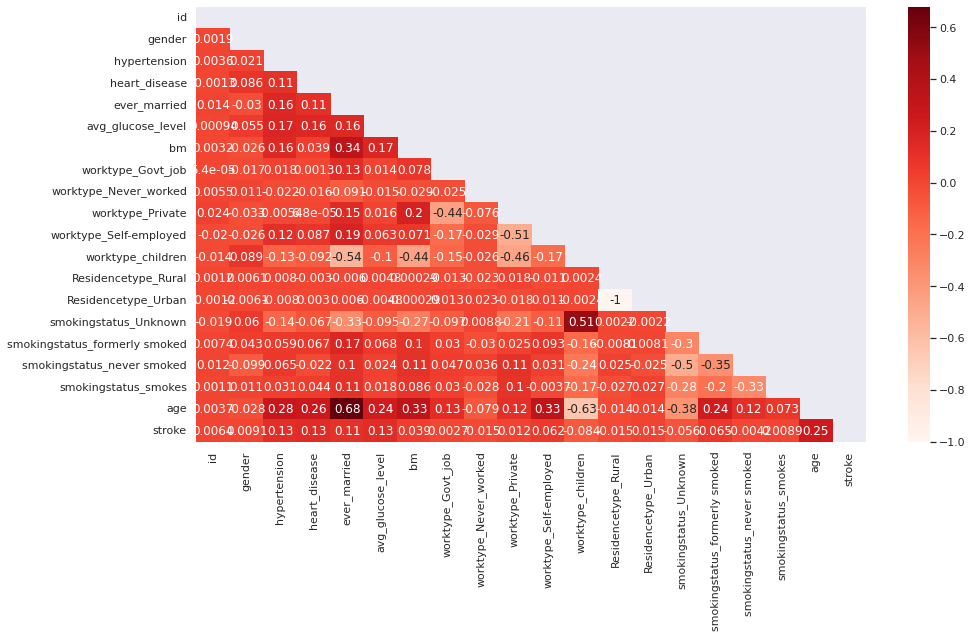

correlated features > 0.1 :
hypertension         0.127891
heart_disease        0.134905
ever_married         0.108299
avg_glucose_level    0.131991
age                  0.245281
stroke               1.000000
Name: stroke, dtype: float64


In [37]:
#Using Pearson Correlation
# Compute the correlation matrix
plt.figure(figsize=(15,8))
cor = df_Final.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(f'correlated features > 0.1 :\n{relevant_features}')

> เมื่อทำ Pearson correlated พบว่ามี 5 columns ที่มีค่า correlation กับการเป็น stroke มากกว่า 0.1 คือ age, heart_disease, avg_glucose_level, hypertension และ ever_married ตามลำดับ<br><br>
> และ Feature ที่มีค่า correlation กับการเป็น stroke สูงที่สุดคือ 'age' ที่ 0.245 โดย Features อื่นๆทีมี่ค่า correlation กับการเป็น stroke น้อยกว่า 1 นั้นส่วนใหญ่จะมี correlated กับ age ด้วย

In [38]:
cols_Select = pd.DataFrame(cor_target)
cols_SelectShow =  cols_Select.sort_values(by=['stroke'], ascending=False)
cols_SelectShow.head(10)

,stroke
stroke,1.000000
age,0.245281
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married,0.108299
worktype_children,0.083888
smokingstatus_formerly smoked,0.064683
worktype_Self-employed,0.062150
smokingstatus_Unknown,0.055924


> จากตารางคือ Top 10 Featrures ที่มีค่า correlation กับหารเป็น stroke สูงที่สุด
> ดังนั้นเราจึงเลือกใช้เฉพาะ Features ที่มีค่า correlation กับหารเป็น stroke มากกว่า 0.05 เพื่อใช้ในการทำ Model ต่อไป

## <font color="MidnightBlue">6.2 Final Dateset<a id="6-2"></a>

In [39]:
cols_Select = pd.DataFrame(cor_target)
cols_Select = cols_Select[cols_Select.stroke > 0.1]

In [40]:
cols_Select

,stroke
hypertension,0.127891
heart_disease,0.134905
ever_married,0.108299
avg_glucose_level,0.131991
age,0.245281
stroke,1.000000


In [41]:
cols_Select = cols_Select.reset_index(col_fill= "Parameters")

In [42]:
x = df_Final[list(cols_Select["index"])[0:-1]]
y = df_Final[list(cols_Select["index"])[-1]]

In [43]:
x.head()

,hypertension,heart_disease,ever_married,avg_glucose_level,age
0,0,1,1,228.69,67.0
1,0,0,1,202.21,61.0
2,0,1,1,105.92,80.0
3,0,0,1,171.23,49.0
4,1,0,1,174.12,79.0


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# <font color="MidnightBlue">7. Splitting the dataset into the Training set (80%) and Test set (20%)<a id="7"></a>

In [45]:
# Train 80: Test 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

print(f'''Train Dataset:
Number x_train dataset: {x_train.shape}
Number y_train dataset: {y_train.shape}

Test Dataset:
Number x_test dataset: {x_test.shape}
Number y_test dataset: {y_test.shape}''')

Train Dataset:
Number x_train dataset: (4087, 5)
Number y_train dataset: (4087,)

Test Dataset:
Number x_test dataset: (1022, 5)
Number y_test dataset: (1022,)


# <font color="MidnightBlue">8. Feature Scaling with StandardScaler<a id="8"></a>

In [46]:
numeric_features = list(x.select_dtypes('float64').columns)
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_features = list(x.select_dtypes('int64').columns)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),])

In [47]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [48]:
x_train

array([[ 1.94917668,  0.68793278,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.09498732, -1.12888266,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.60366621,  1.39693393,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.25407307,  0.0232442 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.32228318, -0.99594495,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.02730892,  0.64362021,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [49]:
x_test

array([[ 8.48760330e-01,  1.70712194e+00,  1.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.16188445e-03, -1.74925867e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-7.39240664e-01,  4.22057352e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 2.88896916e+00,  1.52987165e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.99431081e-01, -3.31256371e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-5.82571962e-01, -1.79357124e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

# <font color="MidnightBlue">9. Handling Imbalance data using SMOTE<a id="9"></a>

In [50]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3892 

After OverSampling, the shape of train_X: (7784, 8)
After OverSampling, the shape of train_y: (7784,) 

After OverSampling, counts of label '1': 3892
After OverSampling, counts of label '0': 3892


In [51]:
x_train_smote

array([[ 1.94917668,  0.68793278,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.09498732, -1.12888266,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.60366621,  1.39693393,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.00510745,  0.76370402,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.90453383,  0.67702446,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.81289741,  0.62346461,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [52]:
y_train_smote

array([0, 0, 1, ..., 1, 1, 1])

# <font color="MidnightBlue">10. Model Selection<a id="10"></a>

## <font color="MidnightBlue">10.1 K-Fold Cross Validation<a id="10-1"></a>

In [53]:
# get a list of models to evaluate
def get_models():
    models = list()
    models.append({'LogisticRegression':LogisticRegression()})
    models.append({'RidgeClassifier':RidgeClassifier()})
    models.append({'KNeighborsClassifier':KNeighborsClassifier()})
    models.append({'DecisionTreeClassifier':DecisionTreeClassifier()})
    models.append({'LinearSVC':LinearSVC()})
    models.append({'SVC':SVC()})
    models.append({'RandomForestClassifier':RandomForestClassifier()})
    models.append({'XGBoost':XGBClassifier(eval_metric= 'error')})
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model, x_data, y_data):
    # evaluate the model
    scores = cross_val_score(model, x_data, y_data, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 

In [54]:
# define test conditions
cv = KFold(n_splits=5, shuffle=True, random_state=17)

# get the list of models to consider
models = get_models()

# collect results
cv_results = list()
model_results = list()

# evaluate each model
for idx, model in enumerate(models):
    s_model =  list(model.values())
    name_model = list(model.keys())
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, s_model[0], x_train_smote, y_train_smote)
    # check for invalid results
    if isnan(cv_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    model_results.append(name_model[0])
    # summarize progress
    #print('>%s:, cv=%.3f' % (type(model).__name__, cv_mean))

print("Done !!! ")

CVresults_df = pd.DataFrame()
CVresults_df['Model'] = model_results
CVresults_df['ACC_results'] = cv_results
CVresults_df = CVresults_df.sort_values(by=['ACC_results'], ascending=False)
CVresults_df

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Done !!! 


,Model,ACC_results
3,DecisionTreeClassifier,0.919704
6,RandomForestClassifier,0.903776
2,KNeighborsClassifier,0.855473
7,XGBoost,0.828109
5,SVC,0.787641
1,RidgeClassifier,0.778647
4,LinearSVC,0.776207
0,LogisticRegression,0.774923


> จากตารางคือค่า mean accuracy จากการทำ valuate model ด้วย K-Fold Cross Validation ที่จำนวน K-Fold = 5

## <font color="MidnightBlue">10.2 Confusion matrix<a id="10-2"></a>

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

accuracy, precision, recall, f1 = {}, {}, {}, {}

for idx, model in enumerate(models):
    
    s_model =  list(model.values())
    name_model = list(model.keys())
    
    key = Pipeline([('clf',s_model[0])])
    # Fit the classifier model
    key.fit(x_train_smote, y_train_smote)

    # Prediction 
    predictions = key.predict(x_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions,y_test)
    precision[key] = precision_score(predictions,y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

## <font color="MidnightBlue">10.3 Summary Model Selection<a id="10-3"></a>

In [56]:
name_model = [ list(x.keys())[0] for i, x in enumerate(models)]

df_model = pd.DataFrame(index=name_model, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model = df_model.sort_values(by=['Precision'], ascending=False)
df_model

,Accuracy,Precision,Recall,F1
RidgeClassifier,0.737769,0.722222,0.133562,0.225434
LinearSVC,0.751468,0.722222,0.140288,0.234940
SVC,0.751468,0.722222,0.140288,0.234940
LogisticRegression,0.758317,0.703704,0.141264,0.235294
XGBoost,0.763209,0.574074,0.124000,0.203947
KNeighborsClassifier,0.808219,0.462963,0.130208,0.203252
RandomForestClassifier,0.876712,0.222222,0.125000,0.160000
DecisionTreeClassifier,0.896282,0.148148,0.117647,0.131148


# <font color="MidnightBlue">11. Tuning the Models<a id="11"></a>

In [ ]:
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

grid_models = [(RidgeClassifier(),[ {'alpha': [0.0001, 0.001, 0.1, 1.0, 1.25, 1.5,],
                                    'fit_intercept': [True, False],
                                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]),
               (LinearSVC(),[{'penalty': ['l2'],
                              'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.25, 1.5],
                              'loss': ['hinge', 'squared_hinge'],
                              'multi_class': ['ovr', 'crammer_singer'],
                              'max_iter': list(range(100000,700000,100000))}]),
               (SVC(),[{'C': [0.25,0.5,0.75,1,1.25,1.5],
                        'kernel': ['linear', 'rbf', 'sigmoid'],
                        'gamma': ['scale', 'auto'],'random_state':[0],
                        'max_iter': list(range(100,700,100))}]),
               (LogisticRegression(),[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                       'penalty':['l1','l2','elasticnet'],
                                       'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                                       'max_iter': list(range(10,200,10)),}]),
               (KNeighborsClassifier(),[{'weights': ['uniform', 'distance'],
                                         'algorithm':['auto','ball_tree','kd_tree'],
                                         'leaf_size':list(range(10,101,10)),
                                         'n_neighbors': list(range(1,5,1)),}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0,1,2,3]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

modelsT_name, modelsT_accuracy, modelsT_param = [], [], []
modelTune = pd.DataFrame()
for i,j in grid_models:
  grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 5)
  grid.fit(x_train_smote, y_train_smote)
  best_accuracy = grid.best_score_
  best_param = grid.best_params_

  modelsT_name = np.append(modelsT_name,str(i)[0:-2])
  modelsT_accuracy = np.append(modelsT_accuracy, best_accuracy)
  modelsT_param = np.append(modelsT_param,str(best_param))

  print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
  print('Best Parameters : ',best_param)
  print('')
  print('----------------')


RidgeClassifier():
Best Accuracy : 77.90%
Best Parameters :  {'alpha': 0.0001, 'fit_intercept': False, 'solver': 'lsqr'}

----------------
LinearSVC():
Best Accuracy : 78.19%
Best Parameters :  {'C': 0.001, 'loss': 'hinge', 'max_iter': 100000, 'multi_class': 'crammer_singer', 'penalty': 'l2'}

----------------


In [ ]:
modelTune = pd.DataFrame()
modelTune['modelsT_name'] = modelsT_name
modelTune['modelsT_accuracy'] = modelsT_accuracy
modelTune['modelsT_param'] = modelsT_param

#modelTune.to_csv("‪D:\\Git\\NIDA\\stroke_prediction\\traditional_modelTune.csv")
modelTune = modelTune.sort_values(by=['modelsT_accuracy'], ascending=False)
modelTune

In [ ]:
def eval_model(models , Model_name, dx_train, dy_train, dx_test, dy_test):
  clf = models
  clf.fit(dx_train,dy_train)

  print(Model_name)
  print()

  print("Training:"+str(clf.score(dx_train, dy_train)))
  print("Test:"+str(clf.score(dx_test,dy_test)))
  print('---------------------------------------------------------')
  print('')

  accuracy_model = clf.score(dx_test,dy_test)

  clf_pred = clf.predict(dx_train)
  print('Train Set:\n', classification_report(dy_train, clf_pred))
  print('---------------------------------------------------------')

  clf_pred = clf.predict(x_test)
  print('Test Set:\n', classification_report(dy_test, clf_pred))
  print('---------------------------------------------------------')
  print('')

  return accuracy_model

In [ ]:
summary_acc = {}
models_select = {}

models_select['RidgeClassifier'] = RidgeClassifier(alpha = 0.0001, solver = 'lsqr')
models_select['LinearSVC'] = LinearSVC(C= 0.001,multi_class = 'crammer_singer',penalty = 'l2',loss='hinge')
models_select['SVC'] = SVC(C= 1.5, gamma = 'scale', kernel = 'rbf', random_state = 0)
models_select['LogisticRegression'] = LogisticRegression(C= 1, max_iter= 100,solver = 'sag', penalty = 'l2')
models_select['KNN'] = KNeighborsClassifier(n_neighbors=5, leaf_size = 10, weights='distance')
models_select['XGBClassifier'] = XGBClassifier(eval_metric= 'error', learning_rate=0.1)
models_select['RandomForest'] = RandomForestClassifier(criterion= 'entropy', random_state = 0, n_estimators= 150)

## <font color="MidnightBlue">11.1 RidgeClassifier<a id="11-1"></a>

In [ ]:
summary_acc['RidgeClassifier'] = eval_model(models_select['RidgeClassifier'] , 'RidgeClassifier', x_train_smote, y_train_smote, x_test, y_test)

## <font color="MidnightBlue">11.2 LinearSVC<a id="11-2"></a>

In [ ]:
summary_acc['LinearSVC'] = eval_model(models_select['LinearSVC'] , 'LinearSVC', x_train_smote, y_train_smote, x_test, y_test)

## <font color="MidnightBlue">11.3 SVC<a id="11-3"></a>

In [ ]:
summary_acc['SVC'] = eval_model(models_select['SVC'] , 'SVC', x_train_smote, y_train_smote, x_test, y_test)

## <font color="MidnightBlue">11.4 LogisticRegression<a id="11-4"></a>

In [ ]:
summary_acc['LogisticRegression'] = eval_model(models_select['LogisticRegression'] , 'LogisticRegression', x_train_smote, y_train_smote, x_test, y_test)

## <font color="MidnightBlue">11.5 KNeighborsClassifier<a id="11-5"></a>

In [ ]:
summary_acc['KNN'] = eval_model(models_select['KNN'] , 'KNN', x_train_smote, y_train_smote, x_test, y_test)

## <font color="MidnightBlue">11.6 Xgboost

In [ ]:
summary_acc['XGBClassifier'] = eval_model(models_select['XGBClassifier'] , 'XGBClassifier', x_train_smote, y_train_smote, x_test, y_test)

## <font color="MidnightBlue">11.7 RandomForestClassifier

In [ ]:
summary_acc['RandomForest'] = eval_model(models_select['RandomForest'] , 'RandomForest', x_train_smote, y_train_smote, x_test, y_test)

In [ ]:
accuracy_01, precision_01, recall_01, f1_01 = {}, {}, {}, {}

for key in models_select.keys():
  # Fit the classifier model
    models_select[key].fit(x_train_smote, y_train_smote)
  # Prediction 
    predictions = models_select[key].predict(x_test)
  # Calculate Accuracy, Precision and Recall Metrics
    accuracy_01[key] = accuracy_score(predictions,y_test)
    precision_01[key] = precision_score(predictions, y_test)
    recall_01[key] = recall_score(predictions, y_test)
    f1_01[key] = f1_score(predictions, y_test)
    
df_model = pd.DataFrame(index=models_select.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = list(accuracy_01.values())
df_model['Precision'] = list(precision_01.values())
df_model['Recall'] = list(recall_01.values())
df_model['F1'] = list(f1_01.values())
df_model

## <font color="MidnightBlue">11.8 Summary Model Accuracy

In [ ]:
accuracy_01, precision_01, recall_01, f1_01 = {}, {}, {}, {}

for key in models_select.keys():
  # Fit the classifier model
    models_select[key].fit(x_train_smote, y_train_smote)
  # Prediction 
    predictions = models_select[key].predict(x_test)
  # Calculate Accuracy, Precision and Recall Metrics
    accuracy_01[key] = accuracy_score(predictions,y_test)
    precision_01[key] = precision_score(predictions, y_test)
    recall_01[key] = recall_score(predictions, y_test)
    f1_01[key] = f1_score(predictions, y_test)
    
df_modelTune = pd.DataFrame(index=models_select.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_modelTune['Accuracy'] = list(accuracy_01.values())
df_modelTune['Precision'] = list(precision_01.values())
df_modelTune['Recall'] = list(recall_01.values())
df_modelTune['F1'] = list(f1_01.values())

df_modelTune = df_modelTune.sort_values(by=['Accuracy'], ascending=False)
df_modelTune

# <font color="MidnightBlue">12. Keras<a id="12"></a>

In [57]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 8.0 MB/s 
     |████████████████████████████████| 1.6 MB 45.1 MB/s 


In [58]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

## <font color="MidnightBlue">12.1 Prepare the environment<a id="12-1"></a>

In [59]:
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
    print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


## <font color="MidnightBlue">12.2 Tuning hyperparameter find the best model (KerasTuner)<a id="12-2"></a>

In [60]:
def model_select_keras(hp):
  model = keras.Sequential()
  model.add(layers.Flatten())

  ################################################ Hidden layer #############################################
  # Tune the number of layers.
  for i in range(hp.Int('num_layers', 1, 3)):
    model.add(
        layers.Dense(
        # Tune number of units.
        units=hp.Choice(f"units_{i}",list(range(21,101,1))),
        # Tune the activation function to use.
        activation=hp.Choice("activation", ["relu", "tanh", 'sigmoid']),
        )
    )
  if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=0.3))
  ################################################ Output layer #############################################
  model.add(layers.Dense(
        # Tune number of units.
        units=1,
        # Tune the activation function to use.
        activation=hp.Choice("activation", ['sigmoid']),
        ))
  # Define the optimizer learning rate as a hyperparameter.
  learning_rate = hp.Choice("lr", [0.01, 0.001, 0.0001, 0.00001])
  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      loss='binary_crossentropy',
      metrics = ['accuracy'])

  return model

model_select_keras(kt.HyperParameters())

In [61]:
# test the build networt model completeeeed!
model_select_keras(kt.HyperParameters())

In [63]:
# start the search
tuner = kt.RandomSearch(
    hypermodel=model_select_keras,
    objective="val_accuracy",
    max_trials=15,
    executions_per_trial=2,
    overwrite=True,
    directory="/model_select_keras/",
    project_name="keras")

In [64]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units_0 (Choice)
{'default': 21, 'conditions': [], 'values': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'ordered': True}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001, 1e-05], 'ordered': True}


In [65]:
tuner.search(x_train_smote, y_train_smote, epochs=2, validation_split= 0.2)

Trial 15 Complete [00h 00m 05s]
val_accuracy: 0.8493898510932922

Best val_accuracy So Far: 0.8734746277332306
Total elapsed time: 00h 01m 22s


In [67]:
models = tuner.get_best_models(num_models=15)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 1, x_train_smote.shape[1] ))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 8)                 0         


 dense (Dense)               (None, 89)                801       


 dense_1 (Dense)             (None, 72)                6480      


 dropout (Dropout)           (None, 72)                0         


 dense_2 (Dense)             (None, 1)                 73        


Total params: 7,354


Trainable params: 7,354


Non-trainable params: 0


_________________________________________________________________


In [68]:
for i in range(len(models)):
  model = models[i]
  model.build(input_shape=(None, 1, x_train_smote.shape[1]))
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 89)                801       
                                                                 
 dense_1 (Dense)             (None, 72)                6480      
                                                                 
 dropout (Dropout)           (None, 72)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 73        
                                                                 
Total params: 7,354
Trainable params: 7,354
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
__________________________________

In [158]:
tuner.results_summary()

Results summary
Results in /model_select_keras/keras
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 3
units_0: 95
activation: tanh
dropout: True
lr: 0.01
units_1: 92
units_2: 21
Score: 0.9210019409656525
Trial summary
Hyperparameters:
num_layers: 3
units_0: 42
activation: tanh
dropout: True
lr: 0.001
units_1: 50
units_2: 66
Score: 0.8744380176067352
Trial summary
Hyperparameters:
num_layers: 1
units_0: 23
activation: sigmoid
dropout: False
lr: 0.01
units_1: 21
units_2: 54
Score: 0.7511239647865295
Trial summary
Hyperparameters:
num_layers: 2
units_0: 35
activation: sigmoid
dropout: False
lr: 0.001
units_1: 57
units_2: 26
Score: 0.6820809245109558
Trial summary
Hyperparameters:
num_layers: 1
units_0: 66
activation: tanh
dropout: True
lr: 0.0001
Score: 0.6795118898153305
Trial summary
Hyperparameters:
num_layers: 1
units_0: 27
activation: relu
dropout: True
lr: 0.01
units_1: 64
Score: 0.6432241499423981
Trial summary
Hyperparameters:
num_layers: 2
units_0: 21
activatio

## <font color="MidnightBlue">12.3 Create the network architecture from best model 

In [74]:
tf.random.set_seed(28)
initializer = tf.keras.initializers.GlorotNormal() 
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape = x_train_smote.shape[1],))  #input
model.add(tf.keras.layers.Dense(89, activation ='tanh', name = "hidden1", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(72, activation ='tanh', name = "hidden2", kernel_initializer=initializer))
#model.add(tf.keras.layers.Dense(21, activation ='tanh', name = "hidden3", kernel_initializer=initializer))
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(1, activation ='sigmoid', name="output"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 89)                801       
                                                                 
 hidden2 (Dense)             (None, 72)                6480      
                                                                 
 dropout_2 (Dropout)         (None, 72)                0         
                                                                 
 output (Dense)              (None, 1)                 73        
                                                                 
Total params: 7,354
Trainable params: 7,354
Non-trainable params: 0
_________________________________________________________________


## <font color="MidnightBlue">12.3 Compile the model<a id="12-3"></a>

In [75]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimize = tf.keras.optimizers.Adam(lr_schedule)

model.compile(optimizer = optimize, loss = "binary_crossentropy", metrics = ['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

## <font color="MidnightBlue">12.4 Train the model on train set<a id="12-4"></a>

In [76]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.4f}_acc{val_acc: .4f}.hdf5"
model_check_point_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,
                                                                save_weight_only = True,
                                                                monitor = "val_acc",
                                                                mode = "max",
                                                                save_best_only = True,
                                                                verbose=1)

### <font color="MidnightBlue">Test model for tuning (1 round)<a id="12-4"></a>

In [144]:
#test model for tuning (1 round)
#history = model.fit(x_train_smote, y_train_smote, batch_size= 16, epochs = 100, verbose = 2, validation_split= 0.2, callbacks=[model_check_point_callback])

### <font color="MidnightBlue">Train model for mean accuracy (3 round)<a id="12-4"></a>

In [77]:
i_round, accuracy_keras_train = [],[]
accuracy_keras_test = []
history_final = {}

for i in range(5):

  print(f'#################################################### Model{i+1} Start !!! ########################################################')

  # tf.random.set_seed(1)
  '''
  initializer = tf.keras.initializers.GlorotNormal()
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape = x_train_smote.shape[1],))  #input
  model.add(tf.keras.layers.Dense(64, activation = "relu", name = "hidden1", kernel_initializer=initializer))
  model.add(tf.keras.layers.Dense(64, activation = "relu", name = "hidden2", kernel_initializer=initializer))

  #Output layer
  model.add(tf.keras.layers.Dense(1,activation = "relu", name = "output"))
  model.summary()

  optimize = tf.keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(optimizer = optimize, loss = "binary_crossentropy", metrics = ['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.4f}_acc{val_acc: .4f}.hdf5"
  model_check_point_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,
                                                                save_weight_only = True,
                                                                monitor = "val_acc",
                                                                mode = "max",
                                                                save_best_only = True,
                                                                verbose=1)
  '''
  np.random.seed(i)
  tf.random.set_seed(i)

  model.build(input_shape=(None, 1, x_train_smote.shape[1] ))
  history_final[i] = model.fit(x_train_smote, y_train_smote, batch_size= 16, epochs = 100, verbose = 2, validation_split= 0.2)

  y_pred = model.predict(x_test)
  y_pred = np.round(y_pred)
  y_pred = np.nan_to_num(y_pred)

  y_train = model.predict(x_train_smote)
  y_train = np.round(y_train)
  y_train = np.nan_to_num(y_train)

  accuracy_keras_train.append(accuracy_score(y_pred,y_test))
  accuracy_keras_test.append(accuracy_score(y_train_smote,y_train))

  i_round.append(i)

  df_accuracy_keras = pd.DataFrame()
  df_accuracy_keras['i_round'] = i_round
  df_accuracy_keras['accuracy_keras_train'] = accuracy_keras_train
  df_accuracy_keras['accuracy_keras_test'] = accuracy_keras_test

  print(f'#################################################### Model{i+1} Done !!! ########################################################\n\n')

#################################################### Model1 Start !!! ########################################################
Epoch 1/100
390/390 - 3s - loss: 0.4774 - acc: 0.7663 - precision_1: 0.6799 - recall_1: 0.7122 - val_loss: 0.4615 - val_acc: 0.7996 - val_precision_1: 1.0000 - val_recall_1: 0.7996 - 3s/epoch - 7ms/step
Epoch 2/100
390/390 - 1s - loss: 0.4668 - acc: 0.7736 - precision_1: 0.6878 - recall_1: 0.7255 - val_loss: 0.4840 - val_acc: 0.7739 - val_precision_1: 1.0000 - val_recall_1: 0.7739 - 1s/epoch - 4ms/step
Epoch 3/100
390/390 - 1s - loss: 0.4641 - acc: 0.7766 - precision_1: 0.6931 - recall_1: 0.7255 - val_loss: 0.7053 - val_acc: 0.6692 - val_precision_1: 1.0000 - val_recall_1: 0.6692 - 1s/epoch - 4ms/step
Epoch 4/100
390/390 - 2s - loss: 0.4669 - acc: 0.7687 - precision_1: 0.6878 - recall_1: 0.7019 - val_loss: 0.3596 - val_acc: 0.8407 - val_precision_1: 1.0000 - val_recall_1: 0.8407 - 2s/epoch - 5ms/step
Epoch 5/100
390/390 - 3s - loss: 0.4607 - acc: 0.7744 - preci

In [78]:
def funMergedata(col_name):
  return [history_final[i].history[col_name] for i in range(5)]

sum_DATA = pd.DataFrame()

sum_DATA['acc'] = pd.concat([pd.Series(x) for x in funMergedata('acc')], axis=0)
sum_DATA['val_acc'] = pd.concat([pd.Series(x) for x in funMergedata('val_acc')], axis=0)
sum_DATA['loss'] = pd.concat([pd.Series(x) for x in funMergedata('loss')], axis=0)
sum_DATA['val_loss'] = pd.concat([pd.Series(x) for x in funMergedata('val_loss')], axis=0)

sum_DATA.head(5)
sum_DATA = sum_DATA.reset_index()

## <font color="MidnightBlue">12.5 Summarize history for accuracy and loss<a id="12-4"></a>

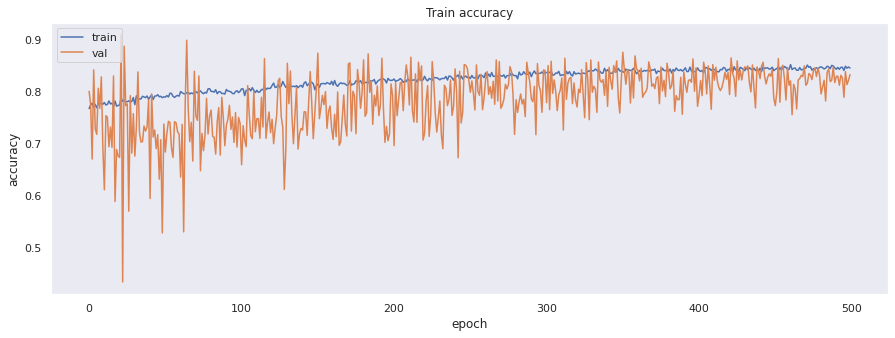

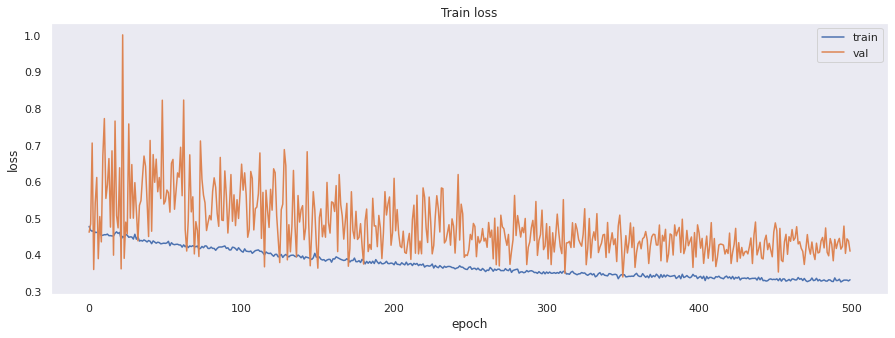

In [79]:
# 5 rounds
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(sum_DATA['acc'])
plt.plot(sum_DATA['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(sum_DATA['loss'])
plt.plot(sum_DATA['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [80]:
# 1round
# Summarize history for accuracy
'''
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()
'''

"\nplt.figure(figsize=(15,5))\nplt.plot(history.history['acc'])\nplt.plot(history.history['val_acc'])\nplt.title('Train accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper left')\nplt.grid()\nplt.show()\n\n# Summarize history for loss\nplt.figure(figsize=(15,5))\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('Train loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'val'], loc='upper right')\nplt.grid()\nplt.show()\n"

## <font color="MidnightBlue">12.6 Evaluate Model<a id="12-5"></a>

In [81]:
#model.load_weights('/content/SaveWeight/bestmodel_epoch51_valloss0.4889_acc 0.7797.hdf5')

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
y_pred = np.nan_to_num(y_pred)

accuracy_keras = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred, target_names=['0','1'], digits=4))

              precision    recall  f1-score   support

           0     0.9657    0.8719    0.9164       968
           1     0.1622    0.4444    0.2376        54

    accuracy                         0.8493      1022
   macro avg     0.5639    0.6582    0.5770      1022
weighted avg     0.9232    0.8493    0.8805      1022



In [82]:
df_accuracy_keras = pd.DataFrame()
df_accuracy_keras['i_round'] = i_round
df_accuracy_keras['accuracy_keras_train'] = accuracy_keras_train
df_accuracy_keras['accuracy_keras_test'] = accuracy_keras_test
describe = df_accuracy_keras.describe()
mean = describe.loc['mean','accuracy_keras_test']
std = describe.loc['std','accuracy_keras_test']

print(mean)
print(std)
print(f'mean+sd:{mean+std}\nmean-sd:{mean-std}')

0.8377697841726617
0.021288500243673087
mean+sd:0.8590582844163348
mean-sd:0.8164812839289886


In [83]:
df_accuracy_keras

,i_round,accuracy_keras_train,accuracy_keras_test
0,0,0.833659,0.803957
1,1,0.855186,0.831963
2,2,0.841487,0.853160
3,3,0.868885,0.842626
4,4,0.849315,0.857143
